<a href="https://colab.research.google.com/github/MayankJadhav784/TASK-16/blob/main/TASK16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving stores_sales_forecasting.csv to stores_sales_forecasting.csv


In [3]:
import pandas as pd
df = pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [8]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df.rename(columns={'Order Date':'date', 'Sales':'sales'}, inplace=True)

In [11]:
monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['sales'].sum().reset_index()
monthly_sales.head()

/tmp/ipython-input-1417149014.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['sales'].sum().reset_index()


,date,sales
0,2014-01-31,6242.525
1,2014-02-28,1839.658
2,2014-03-31,14573.956
3,2014-04-30,7944.837
4,2014-05-31,6912.787


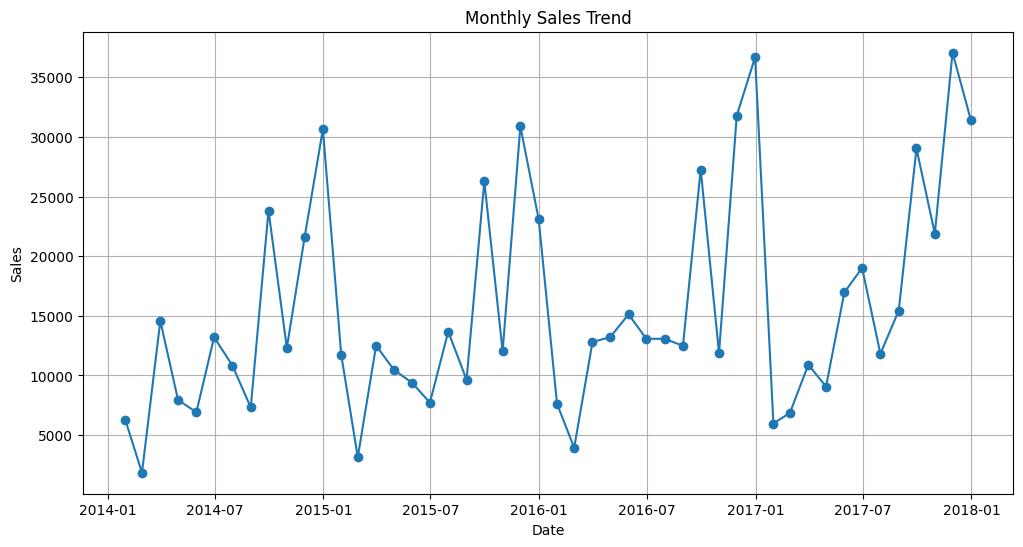

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['date'], monthly_sales['sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

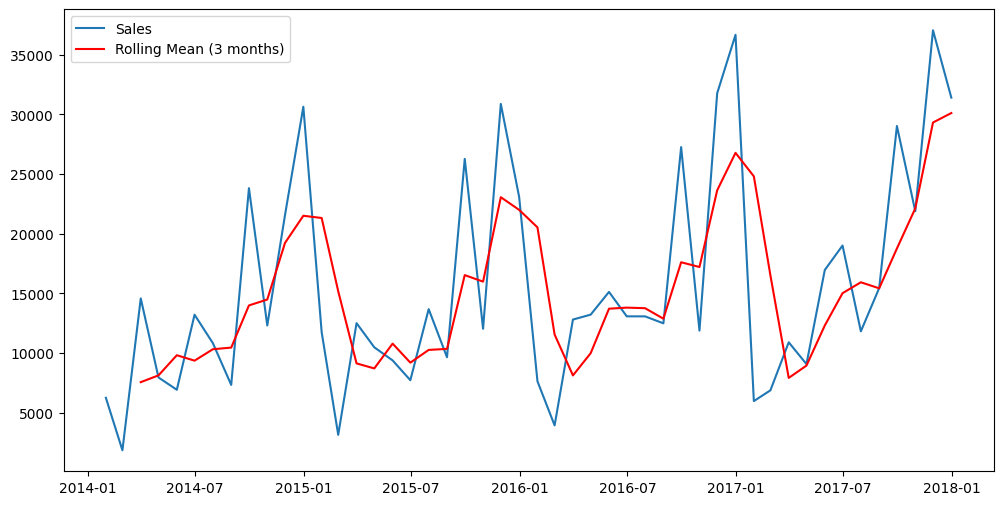

In [13]:
monthly_sales['rolling_mean'] = monthly_sales['sales'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Sales')
plt.plot(monthly_sales['date'], monthly_sales['rolling_mean'], label='Rolling Mean (3 months)', color='red')
plt.legend()
plt.show()

In [14]:
train = monthly_sales.iloc[:-6]
test = monthly_sales.iloc[-6:]

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['sales'], trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(len(test))

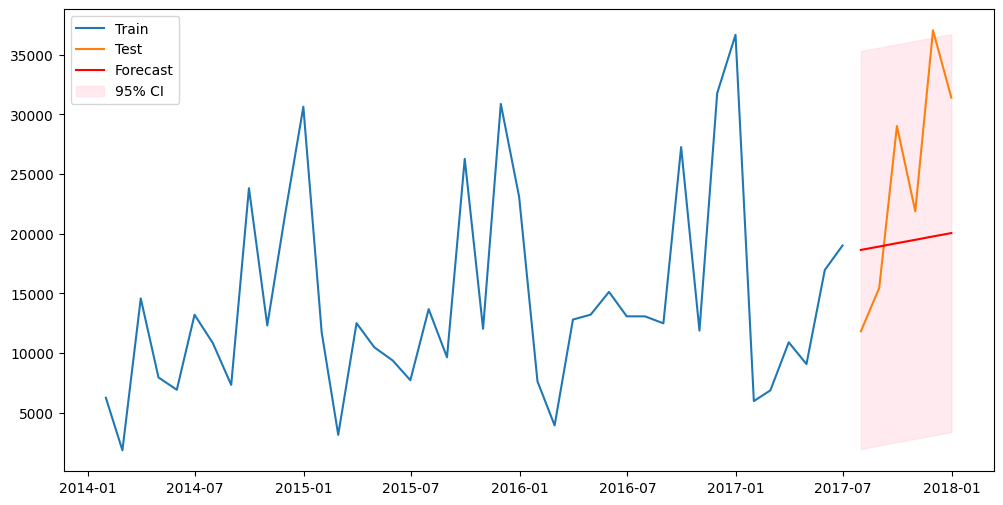

In [16]:
import numpy as np
import matplotlib.pyplot as plt

residuals = train['sales'] - fit.fittedvalues
std_resid = np.std(residuals)

ci_upper = forecast + 1.96 * std_resid
ci_lower = forecast - 1.96 * std_resid

plt.figure(figsize=(12,6))
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(test['date'], forecast, label='Forecast', color='red')
plt.fill_between(test['date'], ci_lower, ci_upper, color='pink', alpha=0.3, label='95% CI')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(test['sales'], forecast)
mape = mean_absolute_percentage_error(test['sales'], forecast)

print("MAE:", mae)
print("MAPE:", mape)

MAE: 8528.584819612443
MAPE: 0.34655752487128216


In [18]:
forecast_output = pd.DataFrame({
    'date': test['date'],
    'actual': test['sales'],
    'forecast': forecast,
    'ci_lower': ci_lower,
    'ci_upper': ci_upper
})

forecast_output.to_csv('forecast_output.csv', index=False)

with open('forecast_report.txt', 'w') as f:
    f.write(f"MAE: {mae}\nMAPE: {mape}\n")
    f.write("Confidence Interval: 95%\n")

In [19]:
from google.colab import files

files.download('forecast_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from google.colab import files

files.download('forecast_report.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>